# Coordinate Transformations in 3D

Following on from 2D graphics transformations, we can extend all standard operations into 3D, retaining and using homogenous coordinates. Our objective will again be to combine the required standard sets of operations into a single *composite* matrix.

In [37]:
## Libraries
%matplotlib inline
import numpy as np
import math 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import sympy as sym

Let's set up a matrix of positions that we can transform.
This time, for arguments sake, we'll play with a 3D triangle.
As before, we'll store the vertices in separate arrays for $x$, $y$, $z$.

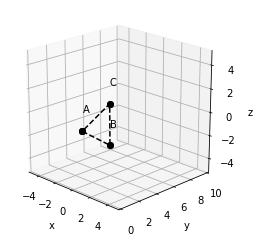

In [38]:
x_vals = np.array([1, 1, 2])
y_vals = np.array([0, 3, 2])
z_vals = np.array([0,-2, 2])
p = np.array([x_vals, y_vals, z_vals])
lx=np.append(x_vals,x_vals[0]) #drawing the line between the last and first coord
ly=np.append(y_vals,y_vals[0])
lz=np.append(z_vals,z_vals[0])
ax = plt.figure().add_subplot(projection='3d')
#ax.view_init(elev=20, azim=315, roll=0)
ax.view_init(20, 315)
ax.plot(lx, ly, lz, 'ko', linestyle="--")
ax.plot(x_vals, y_vals, z_vals, 'ko')
ax.text(lx[0]-1, ly[0]+1, lz[0]+1, "A", c='k')
ax.text(lx[1]-1, ly[1]+1, lz[1]+1, "B", c='k')
ax.text(lx[2]-1, ly[2]+1, lz[2]+1, "C", c='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.set_xlim3d(left=-5, right=5) 
ax.axes.set_ylim3d(bottom=0, top=10) 
ax.axes.set_zlim3d(bottom=-5, top=5)
ax.set_box_aspect([1,1,1])
plt.show()

## Homogenous coordinates

Our first step, as with 2D, is to apply the concept of homogenous coordinates, in order that we correctly format our positions ready for transformation. Our points are currently listed as an array, with the first row being the $x$-coords, and the second row as $y$-coords.

To transform using matrices, we need to have each *column* list a different dimension. We also need to extend each 2D set of points to contain an extra dimension, known as homogenous coordinates. Our plan will be to add these extra coordinates first, then switchs rows and columns (an operation known as the "transpose" of a matrix).

In [22]:
newrow = [1, 1, 1]
hp = np.vstack([p, newrow])
print(hp.transpose())

[[ 1  0  0  1]
 [ 1  3 -2  1]
 [ 2  2  2  1]]


Note that each of the vertices of the object are listed as we saw in the lectures, with set of coordinates each inhabiting its own row.

## Scaling


We learned in lectures to take our vector positions, and scale by the scaling matrix, provided that the object sits at the origin. If not we must also apply a translation before and after scaling:

$$
T_{\underline{w}} = 
	{\begin{pmatrix}
	1 & 0 & 0 & 0  \\
	0 & 1 & 0 & 0  \\
	0 & 0 & 1 & 0  \\
	a & b & c & 1 
	\end{pmatrix}},~~~
S_{S_x,S_y,S_z} =
\begin{pmatrix}
	S_x & 0 & 0 & 0\\
	0 & S_y & 0 & 0\\
	0 & 0 & S_z & 0\\
	0 & 0 & 0 & 1
\end{pmatrix},~~~
T_{\underline{v}} =
	\begin{pmatrix}
	1 & 0 & 0 & 0  \\
	0 & 1 & 0& 0  \\
	0 & 0 & 1 & 0 \\
	a & b & c & 1 
	\end{pmatrix}	
$$



We have to remember to **PRE-MULTIPLY** (due to the standard graphics pipeline approach). This may be different in other web resources and textbooks, but they may use different pipelines or codes.

We'll leave the object unstretched in $x$, but make it three times bigger in $y$ and half as big in $z$.

Remember, if we wish to scale or rotate, we have to move the object to the origin. We will first translate all coordinates so that one is located at the origin. The easiest to target is coordinate (1,0,0), so let us subtract 1 in $x$ from all coordinates. While we're at it, lets create the opposite operation so we don't forget:

In [23]:
Tw = np.matrix([[1, 0, 0, 0], 
                [0, 1, 0, 0], 
                [0, 0, 1, 0],
                [-1,0, 0, 1]])
Tv = np.matrix([[1, 0, 0, 0], 
                [0, 1, 0, 0], 
                [0, 0, 1, 0],
                [1,0, 0, 1]]) 
Sxyz = np.matrix([[1, 0, 0, 0], 
                 [0, 3, 0, 0], 
                 [0, 0, 0.5, 0],
                 [0, 0, 0, 1]]) 

We'll take the homogenous coordinates, and multiply by this scaling matrix.



In [24]:
sp = hp.transpose()*Tw*Sxyz*Tv

For plotting purposes, we'll undo our operations from earlier, and repeat the same plotting operation, overplotting the original coords too. (we'll use the "np.squeeze" command to make the arrays the correct shape for Python to correctly handle).

In [39]:
newp = sp[:,0:3].transpose()
x_vals1 = np.squeeze(np.asarray(newp[0,:]))
y_vals1 = np.squeeze(np.asarray(newp[1,:]))
z_vals1 = np.squeeze(np.asarray(newp[2,:]))
slx=np.append(x_vals1,x_vals1[0])
sly=np.append(y_vals1,y_vals1[0])
slz=np.append(z_vals1,z_vals1[0])

Lets now plot the results:

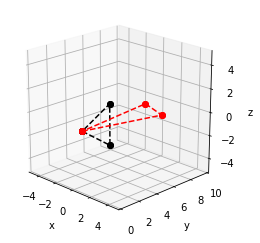

In [28]:
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(20,315)
ax.plot(lx, ly, lz, 'ko', linestyle="--")
ax.plot(x_vals, y_vals, z_vals, 'ko')
ax.plot(slx, sly, slz, 'ro', linestyle="--")
ax.plot(x_vals1, y_vals1, z_vals1, 'ro')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.set_xlim3d(left=-5, right=5) 
ax.axes.set_ylim3d(bottom=0, top=10) 
ax.axes.set_zlim3d(bottom=-5, top=5)
ax.set_box_aspect([1,1,1])
plt.show()

You can see that the object is now three times bigger in $y$, and has been squashed in $z$. Due to the viewing perspective in 3D, it is much more difficult to directly confirm exact sizes visually. Try modifying the azimuth and elevation in the plot (in the "ax.view_init()" command, first number is an angle relative to the z=0 plane, second is an angle relative to y=0 plane) to confirm the sizes in the $x$, $y$ and $z$ directions.

## Rotation


In 3D we can rotate about one of three axis, with a different transformation required in each case:

$$
R_{\theta_{z,\underline{k}}}=
	\begin{pmatrix}
	\cos(\theta_z) & \sin(\theta_z) & 0  & 0 \\
	-\sin(\theta_z) & \cos(\theta_z) & 0 & 0 \\
	0 & 0 & 1 & 0 \\
  0 & 0 & 0 & 1
	\end{pmatrix}, ~~~
R_{\theta_{y,\underline{j}}}=
	\begin{pmatrix}
	\cos(\theta_y) & 0 & -\sin(\theta_y) & 0  \\
	0 & 1 & 0 & 0 \\
	\sin(\theta_y) & 0 & \cos(\theta_y) & 0 \\
  0 & 0 & 0 & 1
	\end{pmatrix},~~~ 
R_{\theta_{x,\underline{i}}}=
	\begin{pmatrix}
	1 & 0 & 0 & 0\\
	0 & \cos(\theta_x) & \sin(\theta_x) & 0 \\
	0 & -\sin(\theta_x) & \cos(\theta_x) & 0 \\
  0 & 0 & 0 & 1
	\end{pmatrix}
$$

Lets test this: I'll create matrices describing a $180^o$ rotation about the $x$-axis and a $45^o$ rotation about the $y$-axis.

In [29]:
thetax = 180
thetay = 45
R_thetai = np.matrix([[1, 0, 0, 0],
                      [0, np.cos(math.radians(thetax)), np.sin(math.radians(thetax)), 0], 
                      [0, -np.sin(math.radians(thetax)), np.cos(math.radians(thetax)), 0], 
                      [0, 0, 0, 1]])
R_thetaj = np.matrix([[np.cos(math.radians(thetay)), 0, -np.sin(math.radians(thetay)), 0],
                      [0, 1, 0, 0], 
                      [np.sin(math.radians(thetay)), 0, np.cos(math.radians(thetay)), 0], 
                      [0, 0, 0, 1]])  

Now let's set up the rotation. Once again, we'll need to make sure the rotation occurs at the origin, so we'll apply the standard sequence of operations:

In [30]:
rp = hp.transpose()*Tw*R_thetaj*Tv

It is much more difficult to instinctively check that the rotation appears as we might expect in 3D. Play with the azimuth parameter in the plot command, which controls the orientation of the plot relative to the z axis.

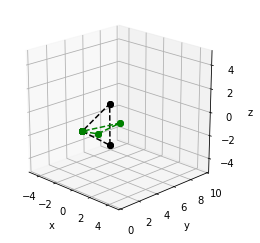

In [32]:
newrp = rp[:,0:3].transpose()
x_vals2 = np.squeeze(np.asarray(newrp[0,:]))
y_vals2 = np.squeeze(np.asarray(newrp[1,:]))
z_vals2 = np.squeeze(np.asarray(newrp[2,:]))
rlx=np.append(x_vals2,x_vals2[0])
rly=np.append(y_vals2,y_vals2[0])
rlz=np.append(z_vals2,z_vals2[0])

ax = plt.figure().add_subplot(projection='3d')
ax.view_init(20,315)
ax.plot(lx, ly, lz, 'ko', linestyle="--")
ax.plot(x_vals, y_vals, z_vals, 'ko')
ax.plot(rlx, rly, rlz, 'go', linestyle="--")
ax.plot(x_vals2, y_vals2, z_vals2, 'go')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.set_xlim3d(left=-5, right=5) 
ax.axes.set_ylim3d(bottom=0, top=10) 
ax.axes.set_zlim3d(bottom=-5, top=5)
ax.set_box_aspect([1,1,1])
plt.show()

Again, it is difficult to tell visually if the rotation has occurred correctly. Try applying smaller increments of rotation angle, and change the viewing angle in the plot to confirm the rotations are taking place correctly.

## Combining operations



We can also use these rotations as an example of how several transformations may be combined into one single matrix which contains all the information about each individual operation to be performed.

Let's see what happens if we apply several operations to our set of coordinates. We'll perform (in order):



1.   Translation to the origin.
2.   Scale by 3 in $y$, 0.5 in $z$.
3.   Rotation in $x$ by $180^o$.
4.   Rotation in $y$ by $45^o$.
5.   Translation back to original point.

Our objective here will be to perform each operation one by one, and compare that with concatenated matrix containing all the operations. 




In [33]:
op1 = hp.transpose()*Tw
op2 = op1*Sxyz
op3 = op2*R_thetai
op4 = op3*R_thetaj
op5 = op4*Tv

In [34]:
op_c = Tw*Sxyz*R_thetai*R_thetaj*Tv
op5c = hp.transpose()*op_c

In [35]:
print("linear ops coords:\n", op5[:,0:3].transpose())

linear ops coords:
 [[ 1.          1.70710678  1.        ]
 [ 0.         -9.         -6.        ]
 [ 0.          0.70710678 -1.41421356]]


In [36]:
print("concatenated ops coords:\n", op5c[:,0:3].transpose())

concatenated ops coords:
 [[ 1.          1.70710678  1.        ]
 [ 0.         -9.         -6.        ]
 [ 0.          0.70710678 -1.41421356]]


Both matrices are identical: concatenating all the operations into one matrix yields the same result as performing the operations on the same set of coordinates successively.

It should be noted though that concatenation is much more efficient. If I wanted to perform the transformation again for different coordinates, I would have to repeat all the operations if carried out successively. However, by storing and using the concatenated matrix, I can reduce the number of operations to only one: multiplying it by the new coordinates. This may seem only a trivial saving, but for objects comprising of many millions of coordinates, this can significantly improve calculation efficiency!